# EO4GEO Summer School Project
## Contents
  
1. Data Exploration  
    1.1 Loading Data & Statistics  
    1.2 Data value distributions  
    1.3 Correlation  
2. Random Forest Regression  
    2.1 RF on full dataset  
        2.1.1 Model Building and Prediction  
        2.1.2 Model Accuracy Assessment  
        2.1.3 Feature Importance  
    2.2 RF only on Sentinel 1 data
        2.2.1 Model Building and Prediction  
        2.2.2 Model Accuracy Assessment  
    2.3 RF based on Top 10 PCA values
        2.3.1 Loadind Data
        2.3.2 Building Model
        2.3.3 Model Accuracy Assessment
3. SVM Linear Regression  
    3.1 Building SVM Model and Prediction  
    3.2 SVM accuracy Assessment
4. CNN Prediction
    4.1 Data normalization  
    4.2 Model Building and Training
    4.3 Model Accuracy Assessment
5. Validation in differnet crop cluster

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point, Polygon
import warnings
import math
import time

# 1. Data Exploration
## 1.1 Loading data & statistics

In [2]:
# load data
data = pd.read_csv("bands_sampled2.csv")
# drop columns that contain NaN
data = data.dropna(axis=0)
print("Pandas Dataframe Info:\n")
data.info()
print("\n\nPandas DataFrame Head:\n")
data.head()

Pandas Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 63
Columns: 109 entries, season to Sen1_a_12
dtypes: float64(103), int64(2), object(4)
memory usage: 53.3+ KB


Pandas DataFrame Head:



,season,district,site,field_lati,field_long,site_latit,site_longi,block_id,seed_id,seed_rate_,...,Sen1_a_3,Sen1_a_4,Sen1_a_5,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12
0,LR2018,Ndalu,Lungai,0.794619,34.89699,0.779332,34.90301,40256,scduma43,7.14,...,-13.94121,-9.80428,-14.88577,-9.77290,5.16037,1.66067,4.13693,4.13693,5.11287,1.52317
1,LR2018,Ndalu,Lungai,0.794742,34.89950,0.779332,34.90301,40257,scduma43,7.14,...,-13.48856,-9.25225,-13.10161,-8.97811,4.53984,1.49301,4.23631,4.23631,4.12350,1.45928
2,LR2018,Ndalu,Lungai,0.802209,34.89371,0.779332,34.90301,40273,scduma43,4.44,...,-12.15951,-8.63480,-12.86275,-8.31539,5.13694,1.56935,3.52472,3.52472,4.54736,1.54686
3,LR2018,Ndalu,Lungai,0.781985,34.89669,0.779332,34.90301,41997,scduma43,5.33,...,-14.45234,-9.17793,-15.76470,-9.66134,5.47585,1.63527,5.27441,5.27441,6.10337,1.63173
4,LR2018,Ndalu,Lungai,0.790014,34.89853,0.779332,34.90301,42004,scduma43,7.14,...,-14.21484,-7.98126,-14.18121,-9.62644,3.52191,1.40955,6.23357,6.23357,4.55477,1.47315


## 1.2 Data Value Distributions

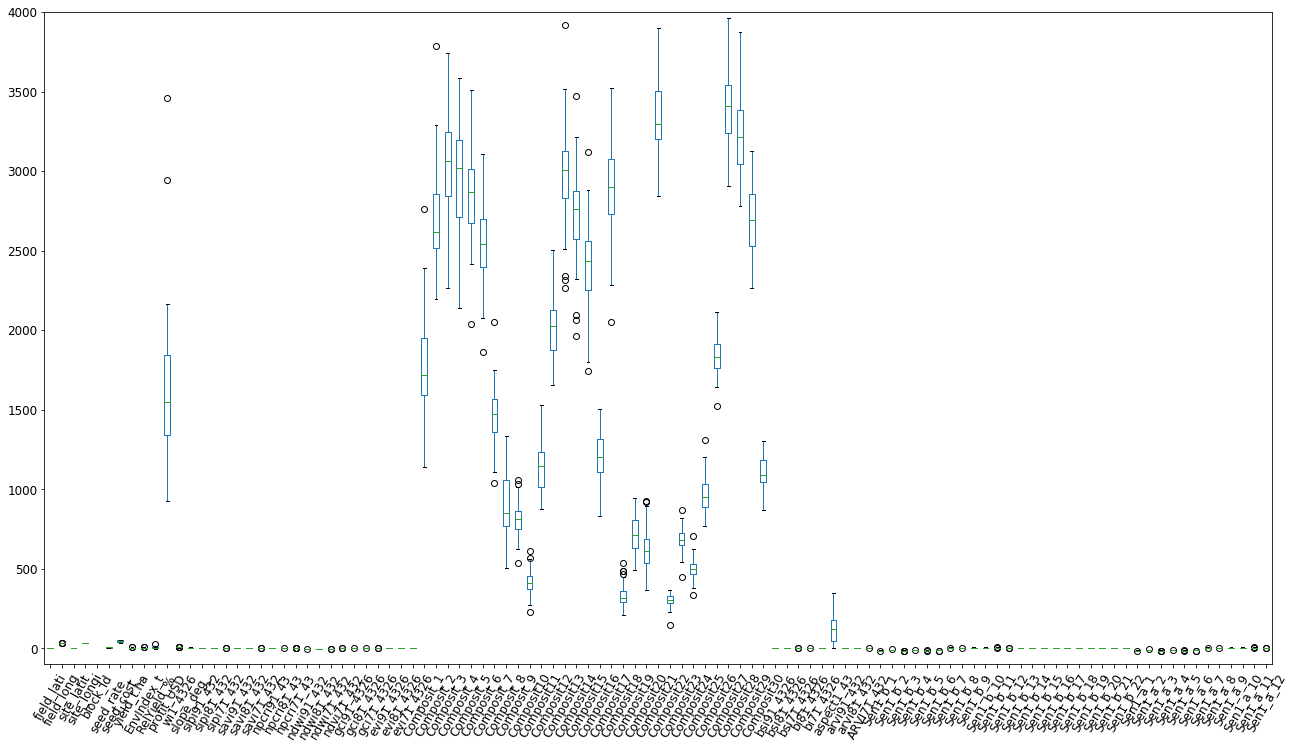

In [3]:
data.plot(kind="box",figsize=(22,12),ylim=((-100,4000)), rot=60,fontsize='large')

## 1.3 Correlation

In [4]:
data.corr(method='pearson')

,field_lati,field_long,site_latit,site_longi,block_id,seed_rate_,seed_cost_,yield_t.ha,EnvIndex_t,RelYield_%,...,Sen1_a_3,Sen1_a_4,Sen1_a_5,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12
field_lati,1.000000e+00,5.068695e-02,-1.644250e-14,NaN,0.063132,1.334425e-01,1.285152e-01,-1.392577e-02,-3.803230e-02,1.115103e-01,...,4.231333e-02,-3.290794e-02,9.159588e-02,1.240108e-01,-9.873860e-02,-9.645274e-02,-7.212150e-02,-7.212150e-02,1.584341e-02,6.122190e-02
field_long,5.068695e-02,1.000000e+00,2.526701e-13,NaN,0.242231,2.018773e-02,2.105971e-02,1.730859e-01,1.347581e-01,1.477409e-01,...,-1.366475e-01,-2.638078e-02,2.410178e-02,9.501294e-02,1.618020e-01,1.190325e-01,1.059550e-01,1.059550e-01,5.743494e-02,1.126066e-01
site_latit,-1.644250e-14,2.526701e-13,1.000000e+00,NaN,0.000000,5.369138e-16,-1.687868e-16,-2.185722e-16,4.894120e-16,-2.482994e-16,...,6.088761e-16,-9.220789e-16,1.100996e-15,-2.412511e-15,-2.161400e-15,-4.347016e-15,-1.280593e-16,-1.280593e-16,-8.990522e-16,-2.585442e-15
site_longi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block_id,6.313239e-02,2.422312e-01,0.000000e+00,NaN,1.000000,9.989870e-02,1.099449e-01,-1.913479e-02,-4.283756e-02,6.432887e-02,...,-3.735980e-04,-1.427277e-01,-7.406465e-02,-1.185005e-01,-3.698823e-02,5.293570e-03,-1.362419e-01,-1.362419e-01,-2.837240e-02,-7.364537e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sen1_a_8,-9.645274e-02,1.190325e-01,-4.347016e-15,NaN,0.005294,-2.016259e-01,-2.024676e-01,-3.796741e-02,-3.544105e-02,-1.290957e-02,...,-5.339401e-02,-1.397786e-01,-1.464521e-01,-1.728899e-01,9.453015e-01,1.000000e+00,-8.251138e-02,-8.251138e-02,-3.652420e-03,-5.147309e-02
Sen1_a_9,-7.212150e-02,1.059550e-01,-1.280593e-16,NaN,-0.136242,-8.385694e-03,-9.157498e-03,-3.649560e-02,-2.343534e-02,-8.708085e-02,...,-5.238308e-01,5.193334e-01,-2.845670e-02,-1.449059e-02,-5.178867e-02,-8.251138e-02,1.000000e+00,1.000000e+00,1.560195e-02,1.509115e-02
Sen1_a_10,-7.212150e-02,1.059550e-01,-1.280593e-16,NaN,-0.136242,-8.385694e-03,-9.157498e-03,-3.649560e-02,-2.343534e-02,-8.708085e-02,...,-5.238308e-01,5.193334e-01,-2.845670e-02,-1.449059e-02,-5.178867e-02,-8.251138e-02,1.000000e+00,1.000000e+00,1.560195e-02,1.509115e-02
Sen1_a_11,1.584341e-02,5.743494e-02,-8.990522e-16,NaN,-0.028372,1.356568e-02,1.411894e-02,5.739467e-02,1.022311e-01,-1.379121e-01,...,-8.756633e-04,1.542413e-02,-6.293231e-01,4.465945e-01,8.160513e-03,-3.652420e-03,1.560195e-02,1.560195e-02,1.000000e+00,9.481195e-01


# 2. Random Forest Regression
## 2.1 RF Prediction on full dataset

In [5]:
# defining features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
features_list = [
"wi1_4326",
"slope_deg_",
"sipi91_432",
"sipi81_432",
"sipi71_432",
"savi91_432",
"savi81_432",
"savi71_432",
"npcri91_43",
"npcri81_43",
"npcri71_43",
"ndwi91_432",
"ndwi81_432",
"ndwi71_432",
"ndvi71_432",
"gci91_4326",
"gci81_4326",
"gci71_4326",
"evi91_4326",
"evi81_4326",
"evi71_4326",
"Composit_1",
"Composit_2",
"Composit_3",
"Composit_4",
"Composit_5",
"Composit_6",
"Composit_7",
"Composit_8",
"Composit_9",
"Composit10",
"Composit11",
"Composit12",
"Composit13",
"Composit14",
"Composit15",
"Composit16",
"Composit17",
"Composit18",
"Composit19",
"Composit20",
"Composit21",
"Composit22",
"Composit23",
"Composit24",
"Composit25",
"Composit26",
"Composit27",
"Composit28",
"Composit29",
"Composit30",
"bsi91_4326",
"bsi81_4326",
"bsi71_4326",
"bi81_4326",
"bi71_4326",
"aspect1_43",
"arvi91_432",
"arvi81_432",
"ARVI71_432",
"Sen1_b_1",
"Sen1_b_2",
"Sen1_b_3",
"Sen1_b_4",
"Sen1_b_5",
"Sen1_b_6",
"Sen1_b_7",
"Sen1_b_8",
"Sen1_b_9",
"Sen1_b_10",
"Sen1_b_11",
"Sen1_b_12",
"Sen1_b_13",
"Sen1_b_14",
"Sen1_b_15",
"Sen1_b_16",
"Sen1_b_17",
"Sen1_b_18",
"Sen1_b_19",
"Sen1_b_20",
"Sen1_b_21",
"Sen1_b_22",
"Sen1_a_1",
"Sen1_a_2",
"Sen1_a_3",
"Sen1_a_4",
"Sen1_a_5",
"Sen1_a_6",
"Sen1_a_7",
"Sen1_a_8",
"Sen1_a_9",
"Sen1_a_10",
"Sen1_a_11",
"Sen1_a_12"]
# define labels and target
features = data[features_list].to_numpy()
labels = data["yield_t.ha"].to_numpy()

## 2.1.1 Building RF Model

In [6]:
# split data to train and test datasets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.15, random_state = 42)

# create RF model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 99, max_depth=100)

# fit model
rf.fit(train_features, train_labels)

# predict values
yield_pred = rf.predict(features)

# add prediction to dataframe, calculate r2
data["yield_pred"] = yield_pred
from sklearn.metrics import r2_score
r2 = r2_score(data["yield_t.ha"],data["yield_pred"])

## 2.1.2 Assess model accuracy

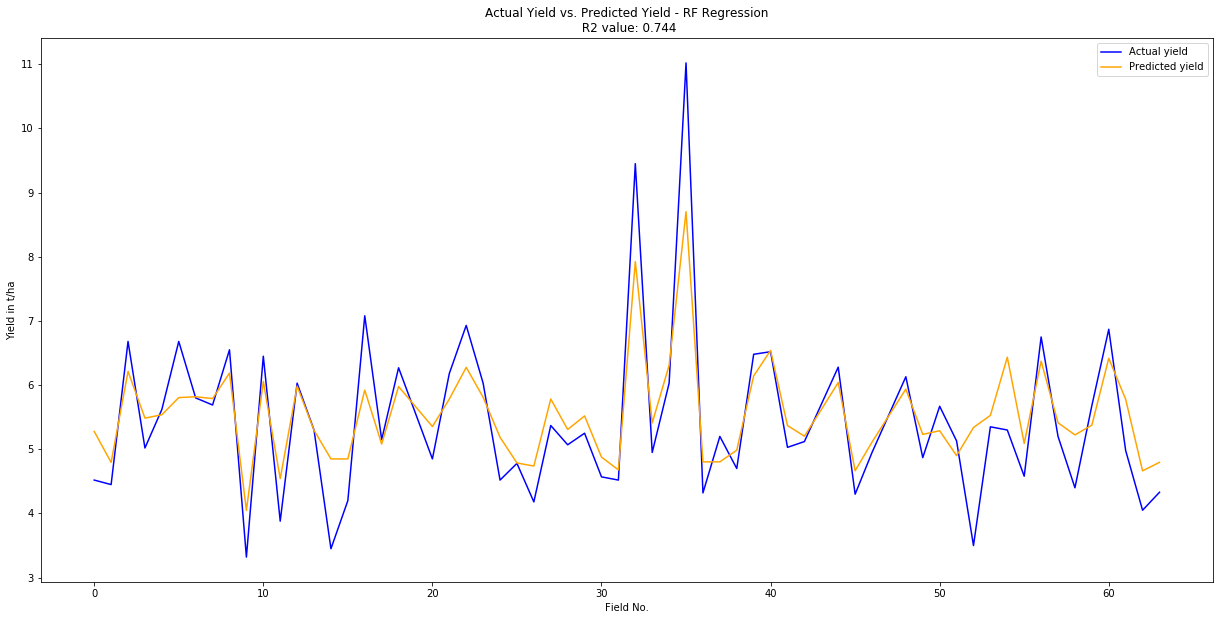

In [7]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression\n R2 value: "+str(round(r2,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

## 2.1.3 Check feature importances

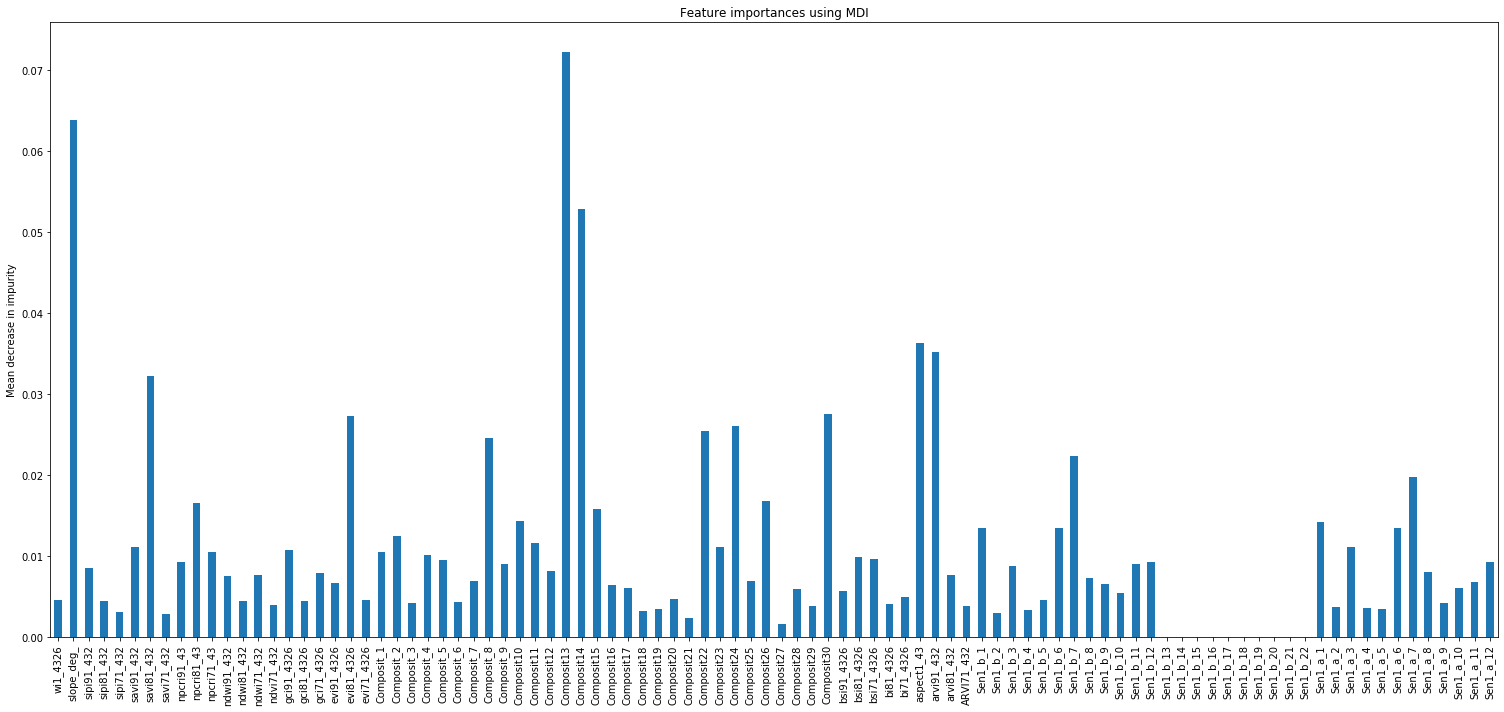

In [8]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances)
x_labels = features_list
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(x_labels)
fig.set_size_inches(21, 10)
fig.tight_layout()

## 2.2 Train RF Model only for Sen1 Data
## 2.2.1 Building model

In [9]:
features_sen= [
"Sen1_b_1",
"Sen1_b_2",
"Sen1_b_3",
"Sen1_b_4",
"Sen1_b_5",
"Sen1_b_6",
"Sen1_b_7",
"Sen1_b_8",
"Sen1_b_9",
"Sen1_b_10",
"Sen1_b_11",
"Sen1_b_12",
"Sen1_b_13",
"Sen1_b_14",
"Sen1_b_15",
"Sen1_b_16",
"Sen1_b_17",
"Sen1_b_18",
"Sen1_b_19",
"Sen1_b_20",
"Sen1_b_21",
"Sen1_b_22",
"Sen1_a_1",
"Sen1_a_2",
"Sen1_a_3",
"Sen1_a_4",
"Sen1_a_5",
"Sen1_a_6",
"Sen1_a_7",
"Sen1_a_8",
"Sen1_a_9",
"Sen1_a_10",
"Sen1_a_11",
"Sen1_a_12"
]
features_sen = data[features_sen].to_numpy()
labels_sen = data["yield_t.ha"].to_numpy()

# Build model
# split data to train and test datasets
train_features_sen, test_features_sen, train_labels_sen, test_labels_sen = train_test_split(features_sen, labels_sen, test_size = 0.15, random_state = 42)

# create RF model
rf_sen = RandomForestRegressor(n_estimators = 1000, random_state = 99, max_depth=100)

# fit model
rf_sen.fit(train_features_sen, train_labels_sen)

# predict values
yield_pred_sen = rf_sen.predict(features_sen)

# add prediction to dataframe, calculate r2
data["yield_pred_sen"] = yield_pred_sen
r2_sen = r2_score(data["yield_t.ha"],data["yield_pred_sen"])

## 2.2.2 Assess Sen1 model accuracy

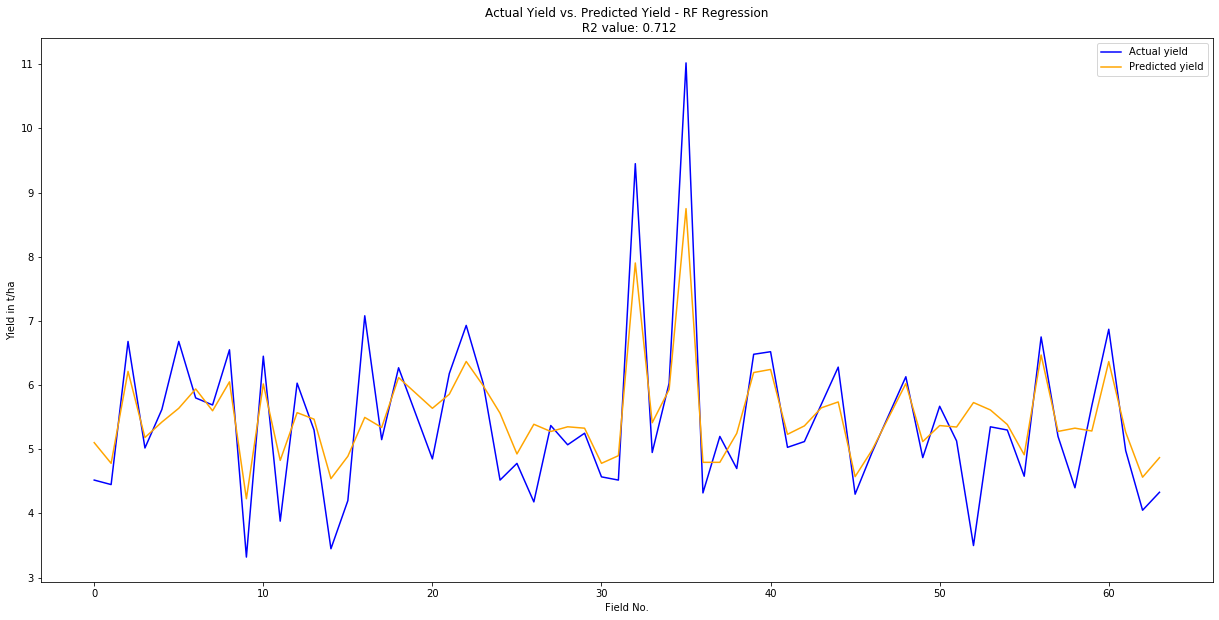

In [10]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred_sen"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression\n R2 value: "+str(round(r2_sen,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

## 2.3 RF on PCA values
## 2.3.1 Loading and defining Data

In [11]:
data_pca = pd.read_csv("bands_sampled3.csv")
data_pca = data_pca.dropna(axis=0)
data_pca["yield_t.ha"] = data_pca["yield_t_ha"]

In [12]:
features_pca_ls = [
"pca1",
"pca2",
"pca3",
"pca4",
"pca5",
"pca6",
"pca7",
"pca8",
"pca9",
"pca10"]

## 2.3.2 Building Model

In [13]:
features_pca = data_pca[features_pca_ls].to_numpy()
labels_pca = data_pca["yield_t.ha"].to_numpy()

# Build model
# split data to train and test datasets
train_features_pca, test_features_pca, train_labels_pca, test_labels_pca = train_test_split(features_pca, labels_pca, test_size = 0.15, random_state = 42)

# create RF model
rf_pca = RandomForestRegressor(n_estimators = 1000, random_state = 99, max_depth=100)

# fit model
rf_pca.fit(train_features_pca, train_labels_pca)

# predict values
yield_pred_pca = rf_pca.predict(features_pca)

# add prediction to dataframe, calculate r2
data_pca["yield_pred_pca"] = yield_pred_pca
r2_pca = r2_score(data_pca["yield_t.ha"],data_pca["yield_pred_pca"])

## 2.3.1 RF based on PCA model accuracy assessment

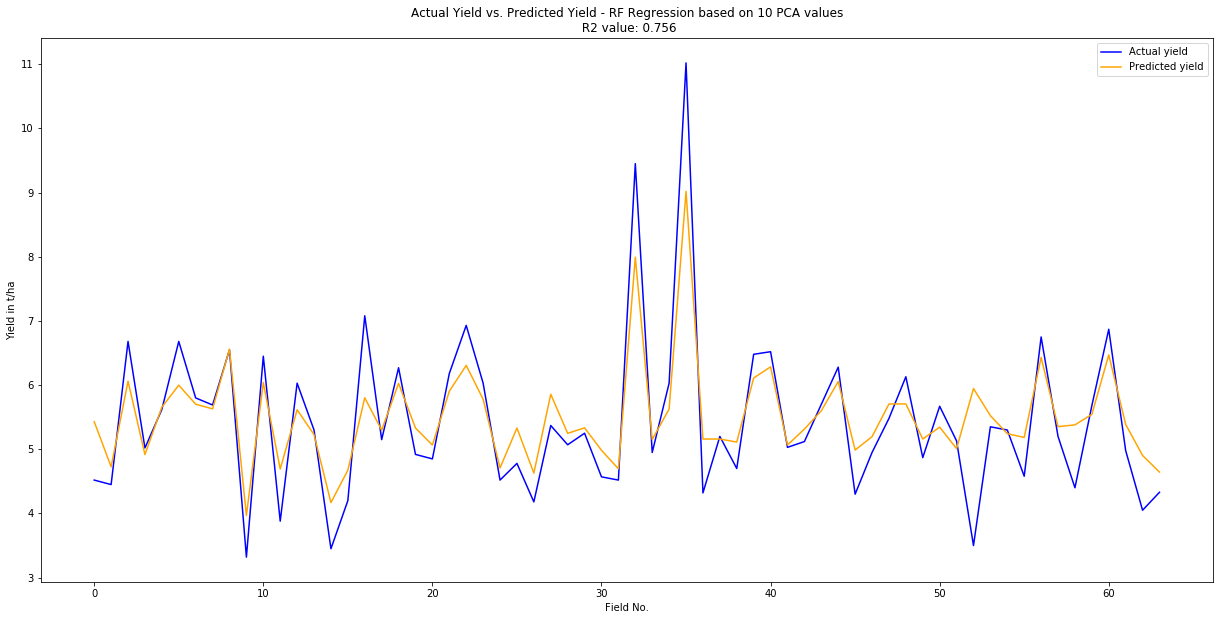

In [14]:
plt.figure(figsize=(21,10))
plt.plot(data_pca["yield_t.ha"],color="blue")
plt.plot(data_pca["yield_pred_pca"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression based on 10 PCA values\n R2 value: "+str(round(r2_pca,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

# 3. SVM Linear Regression Implementation
## 3.1 Building SVM Model & Prediction

In [15]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# split dataset again into new variables for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(features, labels, test_size = 0.15)

# define SVM kernel
svr_lin = SVR(kernel='poly', C=1e3,degree=2)

# train model and predict based on data & features at the same time
y_lin = svr_lin.fit(X_train_svm, y_train_svm).predict(np.array(data[features_list]))

# add predicted values to dataframe
data["yield_pred_svm"] = y_lin

# calculate r2 value
r2_svm = r2_score(data["yield_t.ha"],data["yield_pred_svm"])

## 3.2 SVM accuracy assessment

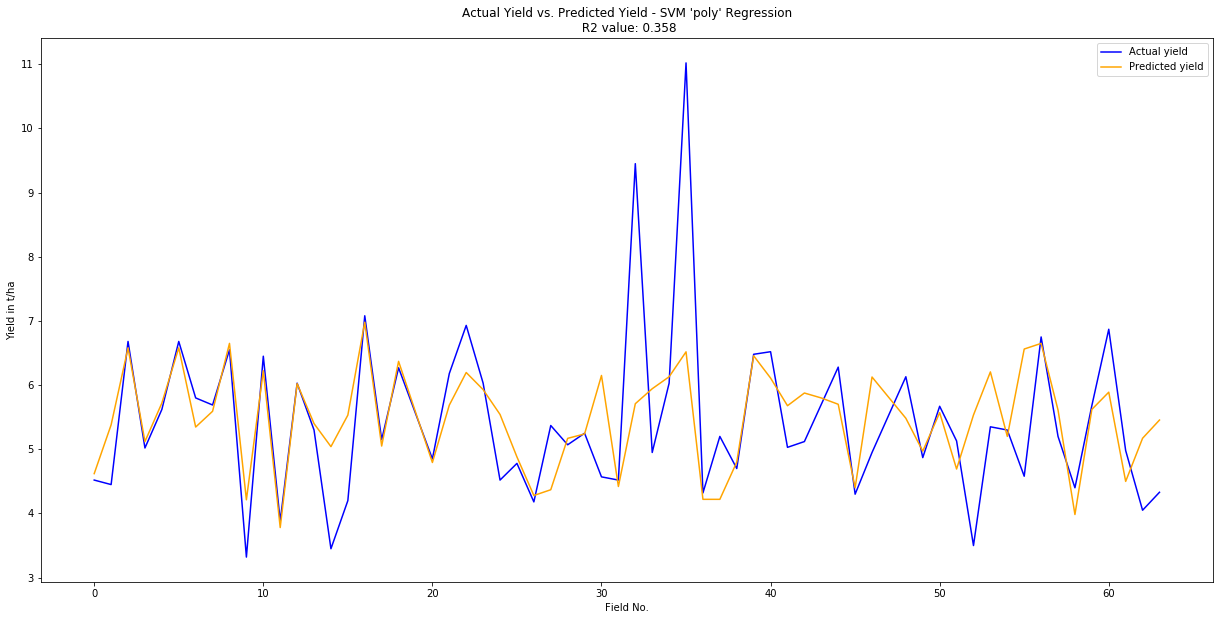

In [16]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred_svm"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - SVM 'poly' Regression\n R2 value: "+str(round(r2_svm,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

In [17]:
y_train_svm

array([ 3.88,  4.7 ,  4.3 ,  5.2 ,  7.08,  5.2 ,  6.28,  4.78,  5.62,
        5.67,  4.33,  9.45,  4.95,  5.8 ,  5.02,  6.03,  5.68,  5.07,
       11.02,  4.2 ,  4.52,  5.3 ,  6.52,  6.13,  6.48,  4.05,  6.75,
        4.45,  6.03,  6.93,  6.45,  6.87,  6.68,  5.7 ,  5.35,  4.87,
        6.03,  4.32,  4.18,  6.18,  4.52,  5.03,  5.69,  6.55,  3.32,
        3.45,  5.15,  5.13,  5.3 ,  6.68,  5.25,  6.27])

# 4. FF-NN prediction
## 4.1 Data Normalization

In [18]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(data[features_list])
data_cnn = data.copy()
data_cnn = pd.DataFrame(data_cnn,columns=features_list.append("yield_t.ha"))
#data_cnn["yield_t.ha"] = data["yield_t.ha"]
data_cnn["field_lati"] = data["field_lati"]
data_cnn["field_long"] = data["field_long"]

In [19]:
# check data vaules
data_cnn.describe()

,field_lati,field_long,site_latit,site_longi,block_id,seed_rate_,seed_cost_,yield_t.ha,EnvIndex_t,RelYield_%,...,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12,yield_pred,yield_pred_sen,yield_pred_svm
count,62.000000,62.000000,6.200000e+01,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.784101,34.900188,7.793320e-01,34.90301,57890.500000,6.091452,44.483871,5.439194,5.150040,5.675558,...,-9.381983,5.197119,1.618423,5.093186,5.093186,4.855432,1.533039,5.532953,5.508877,5.478199
std,0.007795,0.005945,1.119286e-15,0.00000,11670.439659,1.032919,7.666709,1.281877,1.168584,6.014290,...,1.130244,1.356439,0.208313,1.037567,1.037567,1.323676,0.191322,0.762154,0.727004,0.765458
min,0.770393,34.878830,7.793320e-01,34.90301,40256.000000,4.440000,32.000000,3.320000,3.280000,-5.670710,...,-12.916580,2.210040,1.235600,2.889060,2.889060,1.319160,1.155500,4.046673,4.229087,3.780257
25%,0.779064,34.896993,7.793320e-01,34.90301,43540.750000,5.330000,39.000000,4.572500,4.398125,1.765248,...,-10.100022,4.547837,1.468690,4.322317,4.322317,3.984727,1.412968,5.009738,5.107394,4.987713
50%,0.782515,34.900110,7.793320e-01,34.90301,58434.000000,6.660000,49.000000,5.200000,4.947500,4.546833,...,-9.376750,5.124170,1.585370,5.159965,5.159965,4.712620,1.491330,5.393028,5.377498,5.556345
75%,0.789849,34.903608,7.793320e-01,34.90301,66372.500000,7.140000,52.000000,6.105000,5.771875,8.809282,...,-8.539658,6.050348,1.744887,5.664168,5.664168,5.609467,1.627383,5.933361,5.827769,6.088042
max,0.804071,34.910820,7.793320e-01,34.90301,81059.000000,7.140000,52.000000,11.020000,9.647500,31.230280,...,-7.104760,8.012840,2.246580,7.157370,7.157370,8.062890,2.104590,8.701973,8.749615,6.979683


## 4.2 Model Building and Training
Building CNN based on PCA values

In [20]:
# import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import keras

In [21]:
# define model builder module
def build_model(data_pred,predictors,target,hidden_layer_activation):
    # set predictors
    X = data_pred[predictors]
    # set prediciton goals
    y = data_pred[target]
    # split dataset in training & testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=90)
    
    
    #CNN model definition 
    model = Sequential()
    model.add(keras.Input(shape=(len(predictors),))) # define input shape
    model.add(Dense(1, input_dim=1, activation=hidden_layer_activation, name='input_layer' ))
    model.add(Dense(4, activation=hidden_layer_activation, name='1st_hidden_layer' ))
    model.add(Dense(2, activation=hidden_layer_activation, name='2nd_hidden_layer' ))
    model.add(Dense(1, activation='linear', name='output_layer' ))

    # compile the keras model
    model.compile(loss='mse', optimizer='adam')
    print(model)
    return model,X_train, X_test, y_train, y_test,X,y


# build model via function
# normal predictors : features_list
# pca predictors : features_pca_ls
predictors = features_pca_ls
target = ["yield_t.ha"]
model,X_train, X_test, y_train, y_test,X,y = build_model(data_pca,predictors,target,"relu")

print("\n\t\tTraining")
fitting = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)
print("\n\t\tModel trained!")


		Training
Epoch 1/50
4/4 [==============================] - 0s 74ms/step - loss: 29.4938 - val_loss: 36.7721
Epoch 2/50
4/4 [==============================] - 0s 25ms/step - loss: 29.4507 - val_loss: 36.7250
Epoch 3/50
4/4 [==============================] - 0s 38ms/step - loss: 29.4098 - val_loss: 36.6777
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 29.3672 - val_loss: 36.6305
Epoch 5/50
4/4 [==============================] - 0s 22ms/step - loss: 29.3260 - val_loss: 36.5832
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 29.2831 - val_loss: 36.5363
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 29.2420 - val_loss: 36.4891
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 29.2000 - val_loss: 36.4420
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 29.1578 - val_loss: 36.3951
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 29.1164 - val_loss: 36.34

## 4.3 CNN model assessment

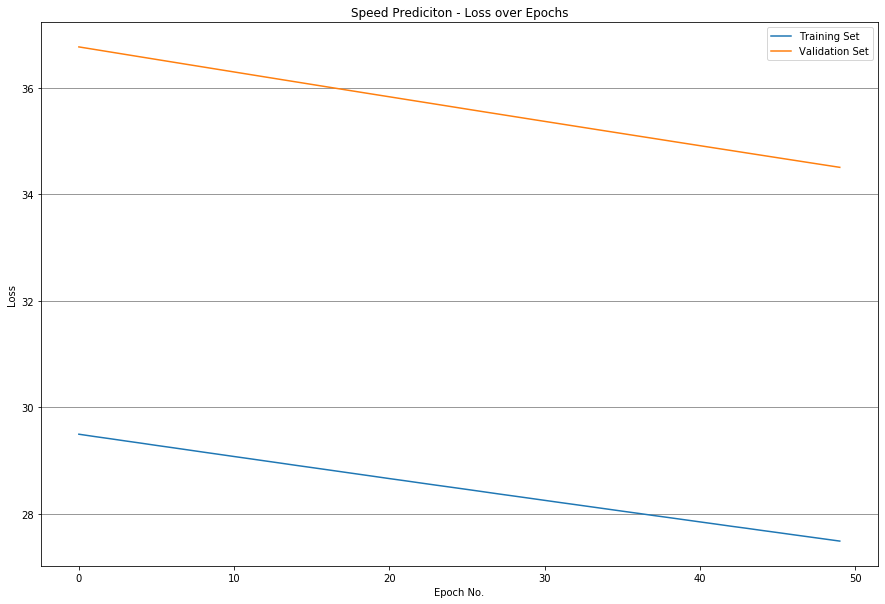

In [22]:
""" Plot Loss Graphs """
# Speed

plt.figure(figsize=(15,10))
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title("Speed Prediciton - Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch No.")
plt.grid(color="gray",axis="y")
plt.legend(["Training Set", "Validation Set"], loc='upper right')
plt.show()

In [23]:
# perform prediction
yield_pred = model.predict(X)
yield_pred[0:10]

array([[0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296],
       [0.19789296]], dtype=float32)

# 5. Validation in differnet crop cluster

After having trained the model, it is now applied to a different cluster of fields in the same dataset. The input features are taken from three different Sen2 scenes. The same PCA technique has been applied to the input data.

In [24]:
# load data
data_test = pd.read_csv("bands_sampled4_test.csv")
# drop columns that contain NaN
data_test = data_test.dropna(axis=0)
print("Pandas Dataframe Info:\n")
data_test.info()
print("\n\nPandas DataFrame Head:\n")
data_test.head()

Pandas Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 62
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      62 non-null     object 
 1   district    62 non-null     object 
 2   site        62 non-null     object 
 3   field_lati  62 non-null     float64
 4   field_long  62 non-null     float64
 5   site_latit  62 non-null     float64
 6   site_longi  62 non-null     float64
 7   block_id    62 non-null     int64  
 8   seed_id     62 non-null     object 
 9   seed_rate_  62 non-null     float64
 10  seed_cost_  62 non-null     int64  
 11  yield_t.ha  62 non-null     float64
 12  EnvIndex_t  62 non-null     float64
 13  RelYield_%  62 non-null     float64
 14  profit_USD  62 non-null     float64
 15  pca1        62 non-null     float64
 16  pca2        62 non-null     float64
 17  pca3        62 non-null     float64
 18  pca4        62 non-null     float64
 19  pca5   

,season,district,site,field_lati,field_long,site_latit,site_longi,block_id,seed_id,seed_rate_,...,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,LR2018,Bungoma,Mabusi,0.536556,34.62442,0.506153,34.5806,3334,scduma43,4.44,...,5873.0,8502.0,2486.0,1790.0,5160.0,2630.0,3992.0,1885.0,1168.0,1082.0
1,LR2018,Bungoma,Mabusi,0.528533,34.62292,0.506153,34.5806,3339,scduma43,4.44,...,4428.0,8044.0,3172.0,1720.0,5037.0,2335.0,3881.0,2231.0,1014.0,683.0
2,LR2018,Bungoma,Mabusi,0.520266,34.63888,0.506153,34.5806,3345,scduma43,7.14,...,4726.0,11264.0,2542.0,1786.0,3949.0,1918.0,4208.0,2044.0,997.0,699.0
3,LR2018,Bungoma,Mabusi,0.524698,34.63703,0.506153,34.5806,3347,scduma43,7.14,...,5037.0,8125.0,2154.0,1774.0,4082.0,2197.0,3931.0,2292.0,943.0,836.0
4,LR2018,Bungoma,Mabusi,0.518706,34.64034,0.506153,34.5806,3597,scduma43,7.14,...,5040.0,10334.0,2639.0,1437.0,4428.0,2299.0,3555.0,2460.0,849.0,628.0


In [25]:
# set features for prediction
features_test_ls = features_pca_ls

In [26]:
# feature list to numpy array
features_test = data_test[features_test_ls].to_numpy()
# predict yield using trained RF
yield_pred_test = rf_pca.predict(features_test)
# append predicted yield to dataframe
data_test["yield_pred_test"] = yield_pred_test
# calculate r2
r2_test = r2_score(data_test["yield_t.ha"],data_test["yield_pred_test"])

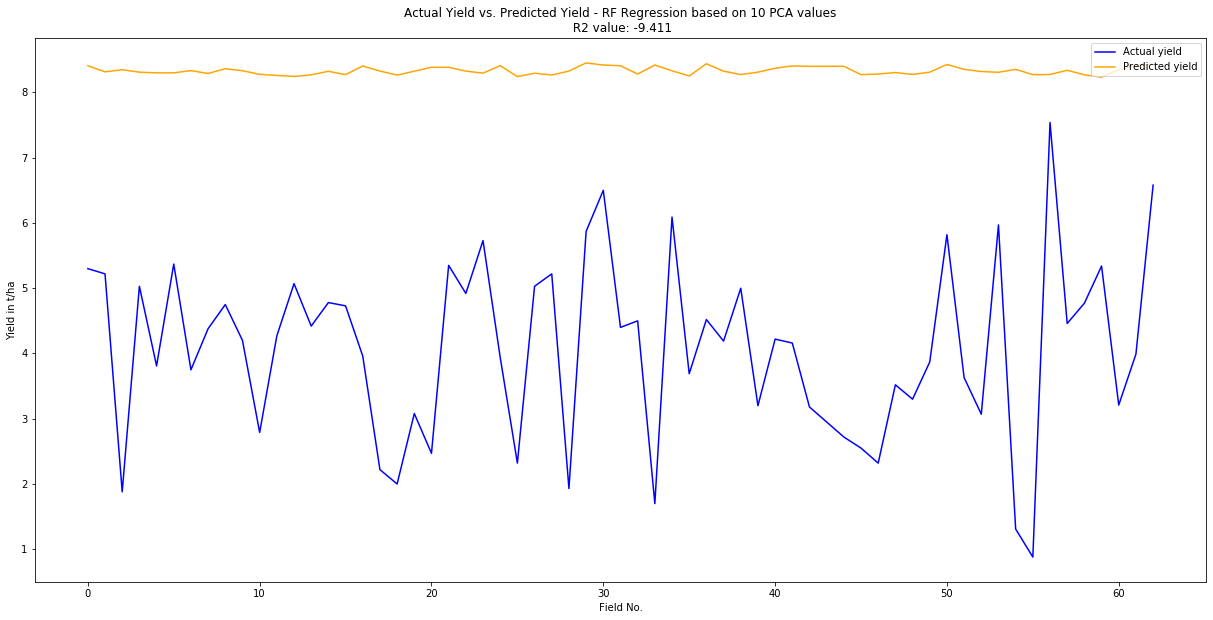

In [27]:
plt.figure(figsize=(21,10))
plt.plot(data_test["yield_t.ha"],color="blue")
plt.plot(data_test["yield_pred_test"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression based on 10 PCA values\n R2 value: "+str(round(r2_test,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()